<a href="https://colab.research.google.com/github/ranja-sarkar/SVM/blob/main/1c_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [26]:
X, y = make_classification(n_samples = 10000, n_features = 2, n_informative = 2,
                           n_redundant = 0, n_classes = 2,
                           n_clusters_per_class = 1,
                           weights = [0.98, 0.02],
                           class_sep = 0.5, random_state = 0)

df = pd.DataFrame({'feature1': X[:, 0], 'feature2': X[:, 1], 'target': y})

In [27]:
df.sample(5)

,feature1,feature2,target
6670,1.448837,1.398722,0
7543,-0.000696,-1.840227,0
8530,-0.096115,-1.555379,0
4887,0.198056,-0.821290,0
924,0.872570,0.360942,0


In [28]:
#Split dataset into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
#print(y_train.shape[0],y_test.shape[0])

In [29]:
one_class_svm = OneClassSVM(nu = 0.01, kernel = 'rbf').fit(X_train)

In [30]:
one_class_svm.get_params()

{'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'nu': 0.01,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

>> https://scikit-learn.org/stable/modules/generated/sklearn.svm.OneClassSVM.html#sklearn.svm.OneClassSVM

In [31]:
prediction = one_class_svm.predict(X_test)
prediction = [1 if i ==-1 else 0 for i in prediction]
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1957
           1       0.71      0.23      0.35        43

    accuracy                           0.98      2000
   macro avg       0.85      0.62      0.67      2000
weighted avg       0.98      0.98      0.98      2000



In [32]:
df_test = pd.DataFrame(X_test, columns = ['feature1', 'feature2'])
df_test['y_test'] = y_test
df_test['svm_predictions'] = prediction

print(df_test.head(5))

   feature1  feature2  y_test  svm_predictions
0  0.449402 -0.685085       0                0
1 -0.018865 -1.575894       0                0
2 -0.108337 -1.846017       0                0
3  1.062452  0.576659       0                0
4  0.665846 -0.431161       0                0


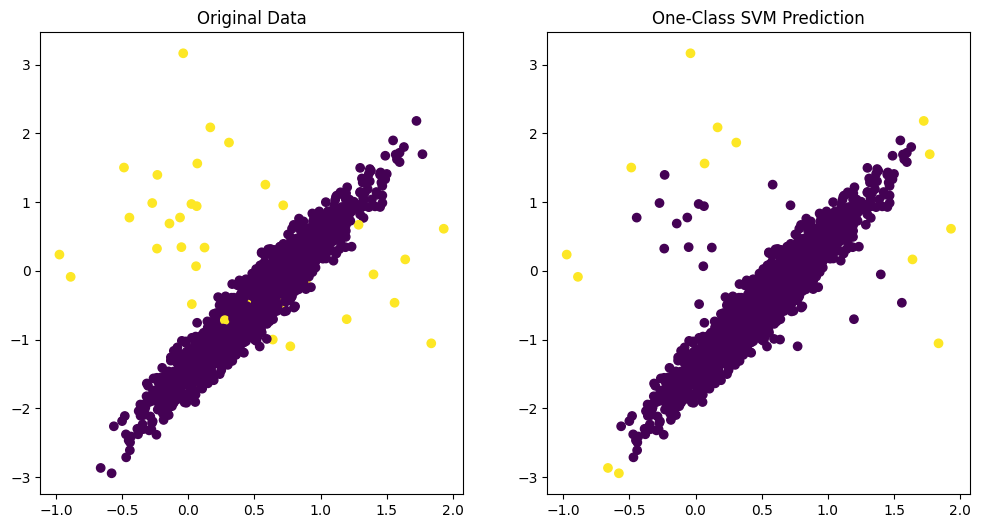

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 6))
ax1.set_title('Original Data')
ax1.scatter(df_test['feature1'], df_test['feature2'], c = df_test['y_test'], label =True)
ax2.set_title('One-Class SVM Prediction')
ax2.scatter(df_test['feature1'], df_test['feature2'], c = df_test['svm_predictions'], label = True)

In [39]:
#score, score_threshold = one_class_svm.score_samples(X_test), np.percentile(score, 2)
#print(f'The customized score threshold for 2% of outliers is {score_threshold:.2f}')

Oclass_svm0 = OneClassSVM(nu = 0.02, kernel = 'rbf').fit(X_train)

In [40]:
prediction = Oclass_svm0.predict(X_test)
prediction = [1 if i ==-1 else 0 for i in prediction]
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1957
           1       0.71      0.58      0.64        43

    accuracy                           0.99      2000
   macro avg       0.85      0.79      0.82      2000
weighted avg       0.98      0.99      0.99      2000



In [41]:
df_test = pd.DataFrame(X_test, columns = ['feature1', 'feature2'])
df_test['y_test'] = y_test
df_test['svm_predictions'] = prediction

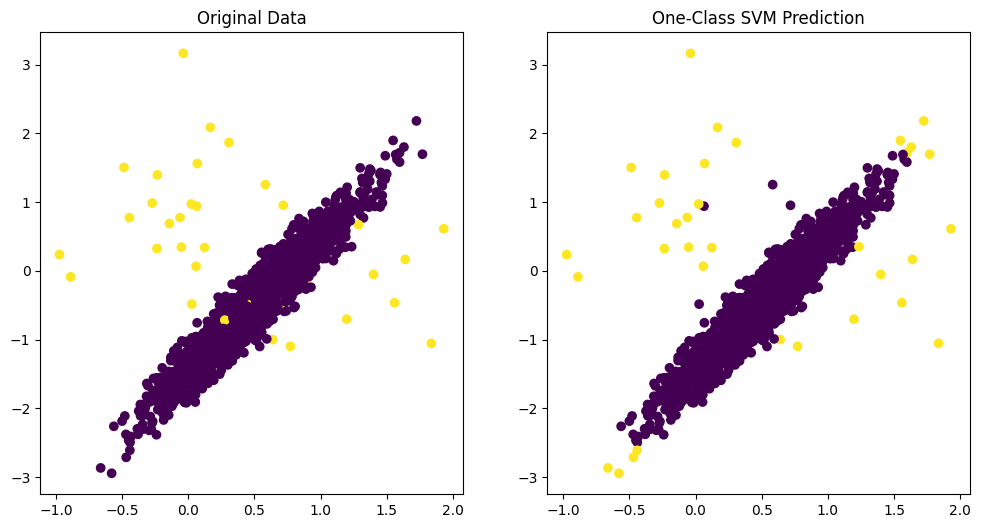

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 6))
ax1.set_title('Original Data')
ax1.scatter(df_test['feature1'], df_test['feature2'], c = df_test['y_test'])
ax2.set_title('One-Class SVM Prediction')
ax2.scatter(df_test['feature1'], df_test['feature2'], c = df_test['svm_predictions'])

>> https://scikit-learn.org/stable/modules/outlier_detection.html#outlier-detection